In [238]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np

In [120]:
# loading 'book' dataset
book = pd.read_csv('book.csv')

In [121]:
# no null values present
book.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [122]:
# contains 2000 observations
# and 11 columns
book.shape

(2000, 11)

In [123]:
# dataset is already encoded 
# with one-hot encoding 
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [309]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False
freq,1154,1505,1138,1436,1571,1518,1448,1773,1926,1903,1783


In [124]:
# converting to 'bool' type
book = book.astype('bool')

In [125]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,False,True,False,True,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,True,False,True,False,False,False,False
4,False,False,True,False,False,False,True,False,False,False,False


## 1] Observe the change in number of rules for different support,confidence values

In [225]:
freqItems = apriori(book,min_support=0.05,max_len=11,
                        use_colnames=True)

In [226]:
def getRules(itemSet,thresh,metric='support'):
    length = []
    for x in thresh :
        y = association_rules(itemSet,
                              metric=metric,
                              min_threshold=x)
        length.append(len(y))
    return length
    

In [229]:
support = np.linspace(0,1,50)[1:-1]
confidence = np.linspace(0,1,50)[1:-1]

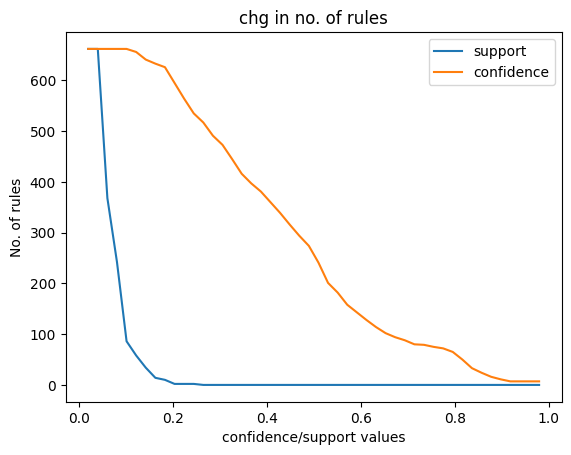

In [231]:
plt.title('chg in no. of rules')
plt.plot(support,getRules(freqItems,support),
         label='support')
plt.plot(confidence,getRules(freqItems,confidence,metric="confidence"),
         label='confidence')
plt.ylabel('No. of rules')
plt.xlabel('confidence/support values')
plt.legend()
plt.show()

### As confidence value is increased, no. of rules created fall steadily while with increase in support value, no. of rules created fall exponentially.

## 3] Visulize the obtained rules using different plots

In [292]:
# creating first model with less number of rules
model = association_rules(freqItems,
                          metric='support',
                          min_threshold=0.15)

In [293]:
model

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


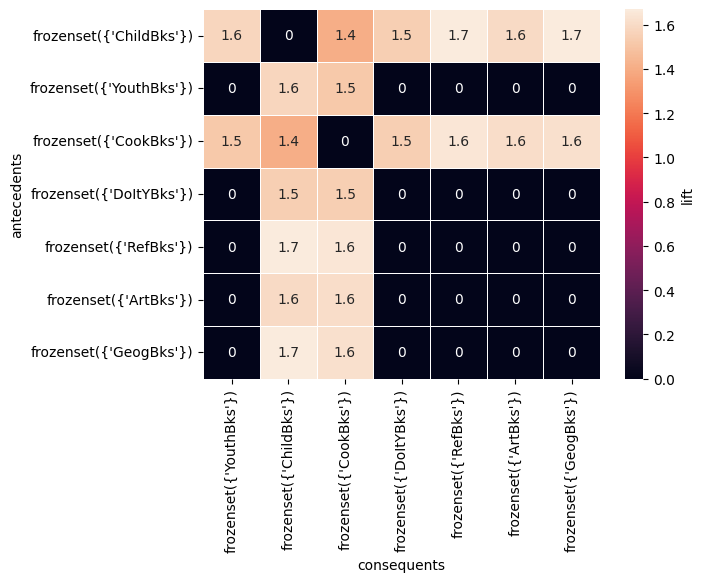

In [299]:
# heatmap is ideal when we have less number of rules
# visualizing association rules using heatmap 
# heatmap with lift 
sns.heatmap(model.pivot('antecedents','consequents','lift').fillna(0),
            annot=True,
            linewidth=0.5,
            cbar_kws={'label': 'lift'})
plt.show()

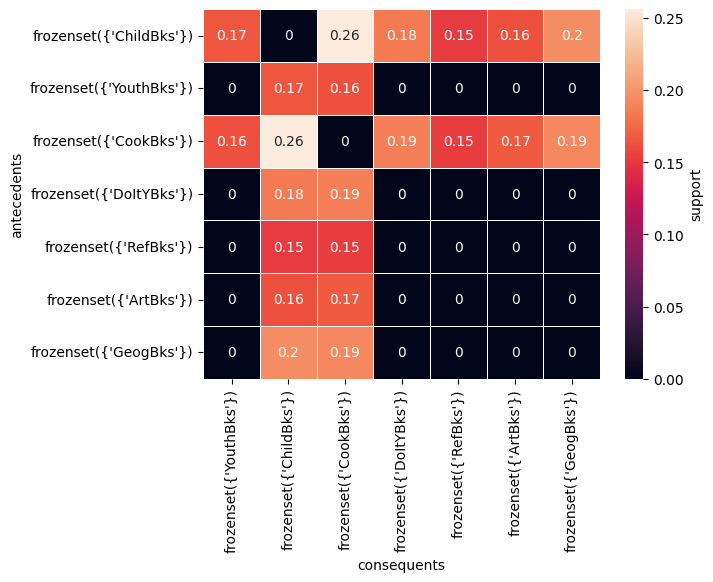

In [300]:
# visualizing association rules using heatmap 
# heatmap with support 
sns.heatmap(model.pivot('antecedents','consequents','support').fillna(0),
            annot=True,
            linewidth=0.5,
            cbar_kws={'label': 'support'})
plt.show()

In [301]:
# creating model with larger number of rules
model2 = association_rules(freqItems,
                          metric='support',min_threshold=0.005)

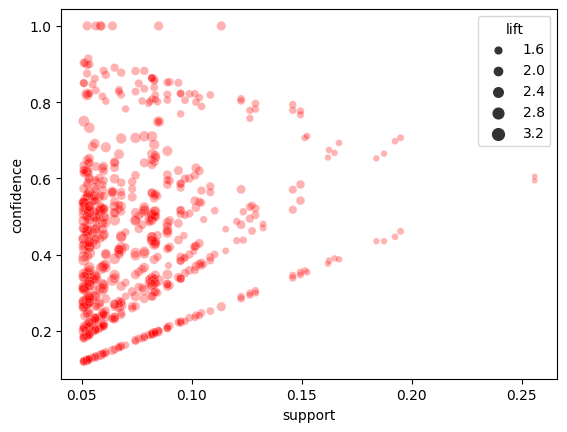

In [307]:
# visalizing entire dataset
# some sort of triangular pattern can be observed 
sns.scatterplot(x='support',y='confidence',size='lift',data=model2,
                alpha=0.3,
                color='red')
plt.show()

## 2] Change the minimum length in apriori algorithm

In [160]:
# returns all the item sets with given min_length
def aprioriMinLen(df,min_support=0.2,min_len=1):
    maxLen = len(df.columns)
    maxAssoc = apriori(df,min_support=min_support,
                       max_len=maxLen,
                       use_colnames=True)
    if min_len > 1:
        minAssoc = apriori(df,min_support=min_support,
                           max_len=min_len-1,
                           use_colnames=True)
        x = maxAssoc[~maxAssoc.isin(minAssoc)].dropna()
        x.reset_index(inplace=True)
        x.drop(['index'],axis=1,inplace=True)
        return x
    else:
        return maxAssoc
    

In [167]:
# all the item sets with 'min_length = 3'
aprioriMinLen(book,min_support=0.01,min_len=3)

,support,itemsets
0,0.1290,"(ChildBks, CookBks, YouthBks)"
1,0.0950,"(ChildBks, DoItYBks, YouthBks)"
2,0.0830,"(ChildBks, RefBks, YouthBks)"
3,0.0805,"(ChildBks, ArtBks, YouthBks)"
4,0.0990,"(ChildBks, GeogBks, YouthBks)"
...,...,...
524,0.0125,"(RefBks, CookBks, ItalCook, ItalAtlas, ItalArt..."
525,0.0145,"(RefBks, CookBks, GeogBks, ChildBks, DoItYBks,..."
526,0.0105,"(GeogBks, CookBks, ItalCook, ChildBks, ItalArt..."
527,0.0100,"(RefBks, CookBks, GeogBks, ItalCook, ChildBks,..."


In [168]:
# all the item sets with 'min_length = 2'
aprioriMinLen(book,min_support=0.01,min_len=2)

,support,itemsets
0,0.1650,"(ChildBks, YouthBks)"
1,0.2560,"(ChildBks, CookBks)"
2,0.1840,"(ChildBks, DoItYBks)"
3,0.1515,"(ChildBks, RefBks)"
4,0.1625,"(ChildBks, ArtBks)"
...,...,...
578,0.0125,"(RefBks, CookBks, ItalCook, ItalAtlas, ItalArt..."
579,0.0145,"(RefBks, CookBks, GeogBks, ChildBks, DoItYBks,..."
580,0.0105,"(GeogBks, CookBks, ItalCook, ChildBks, ItalArt..."
581,0.0100,"(RefBks, CookBks, GeogBks, ItalCook, ChildBks,..."


In [169]:
# all the item sets with 'min_length = 4'
aprioriMinLen(book,min_support=0.01,min_len=4)

,support,itemsets
0,0.0820,"(ChildBks, DoItYBks, CookBks, YouthBks)"
1,0.0680,"(ChildBks, RefBks, CookBks, YouthBks)"
2,0.0670,"(ChildBks, CookBks, YouthBks, ArtBks)"
3,0.0830,"(ChildBks, GeogBks, CookBks, YouthBks)"
4,0.0460,"(ChildBks, CookBks, ItalCook, YouthBks)"
...,...,...
381,0.0125,"(RefBks, CookBks, ItalCook, ItalAtlas, ItalArt..."
382,0.0145,"(RefBks, CookBks, GeogBks, ChildBks, DoItYBks,..."
383,0.0105,"(GeogBks, CookBks, ItalCook, ChildBks, ItalArt..."
384,0.0100,"(RefBks, CookBks, GeogBks, ItalCook, ChildBks,..."
